In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('PredictorLSretWide.csv')
df

,date,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,1926-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-13.686393,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.135248,NaN,NaN,NaN,NaN,NaN,NaN
2,1926-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-4.832534,NaN,NaN,NaN,NaN,NaN,NaN
3,1926-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-4.440934,NaN,NaN,NaN,NaN,NaN,NaN
4,1926-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.483265,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,2022-08-31,1.019538,-2.412224,-1.913597,1.928721,2.741776,NaN,NaN,1.347350,-4.050457,...,-1.615839,-11.692944,-8.326179,-4.467901,0.216663,-5.978392,8.577257,-2.591933,-2.451913,-1.467892
1160,2022-09-30,-2.888651,2.895650,-0.492878,1.546341,-5.482939,NaN,NaN,-6.515619,-2.104168,...,-4.828041,2.106418,2.906625,-3.030688,0.105947,8.239848,0.485810,10.430349,6.948029,4.607782
1161,2022-10-31,3.384184,-3.041480,-0.437972,1.439492,14.154554,NaN,NaN,-2.241708,5.847384,...,-2.659325,13.064743,9.269617,-0.339419,-0.638394,-4.242074,-8.276771,-4.179820,-3.358313,-5.818550
1162,2022-11-30,-0.060910,2.179653,0.734355,-1.934128,-0.503022,NaN,NaN,-0.914064,5.350460,...,-1.242773,11.645717,14.288103,-0.150439,2.255298,5.601910,-5.353664,-6.738538,-2.475098,-2.581228


In [2]:
df1 = df.fillna(method='bfill') # interpolate the dataframe
np.where(df1.isnull().any(axis=0)==True)

(array([  6,   7,  39,  46,  81, 114, 142, 148, 149, 150, 151, 190]),)

In [3]:
date = df['date']
df = df.drop(columns='date')
df = df.interpolate(limit=10)
df_cum = (1+df/100).cumprod()
# df_cum = df_cum.fillna(1)
df_cum1 = df_cum.iloc[:950,:]
df_cum2 = df_cum.iloc[950:,:]
df_cum1 = df_cum1.fillna(1)
df_cum2 = df_cum2.fillna(method='ffill')
df_cum = pd.concat([df_cum1,df_cum2])
df_cum

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.863136,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.818812,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.779243,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.744637,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.763128,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,40.585307,2.203983,2.491331,28.808365,3656.071584,1.259166,3.615544,17.196484,9.269257,32.688047,...,302.163398,784.678797,7.363540,4.338092,3.364451,39.204965,9.017016,63.208423,125.789957,37.333335
1160,39.412939,2.267803,2.479052,29.253840,3455.611421,1.259166,3.615544,16.076027,9.074216,32.608778,...,287.574824,801.207411,7.577571,4.206618,3.368015,42.435394,9.060821,69.801283,134.529880,39.053573
1161,40.746746,2.198828,2.468194,29.674947,3944.737816,1.259166,3.615544,15.715649,9.604821,32.624699,...,279.927275,905.883102,8.279983,4.192340,3.346514,40.635253,8.310878,66.883714,130.011945,36.781222
1162,40.721927,2.246755,2.486320,29.100996,3924.894936,1.259166,3.615544,15.571998,10.118723,31.811907,...,276.448415,1011.379680,9.463035,4.186033,3.421988,42.911604,7.865941,62.376730,126.794022,35.831814


In [4]:
# mini-max normalisation
df_cum_norm = pd.DataFrame(columns=df_cum.columns)
for column in df_cum.columns:
    df_cum_norm[column] = (df_cum[column]-df_cum[column].min())/(df_cum[column].max()-df_cum[column].min())
df_cum_norm

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,0.000630,0.103140,0.013375,0.002174,0.000046,0.000000,0.037184,0.010773,0.000000,0.000658,...,0.000000,0.000351,0.007805,0.053421,0.000000,0.000000,0.014796,0.001137,0.000000,0.001020
1,0.000630,0.103140,0.013375,0.002174,0.000046,0.000000,0.037184,0.010773,0.000000,0.000658,...,0.000000,0.000351,0.007805,0.043686,0.000000,0.000000,0.014796,0.001137,0.000000,0.001020
2,0.000630,0.103140,0.013375,0.002174,0.000046,0.000000,0.037184,0.010773,0.000000,0.000658,...,0.000000,0.000351,0.007805,0.034995,0.000000,0.000000,0.014796,0.001137,0.000000,0.001020
3,0.000630,0.103140,0.013375,0.002174,0.000046,0.000000,0.037184,0.010773,0.000000,0.000658,...,0.000000,0.000351,0.007805,0.027394,0.000000,0.000000,0.014796,0.001137,0.000000,0.001020
4,0.000630,0.103140,0.013375,0.002174,0.000046,0.000000,0.037184,0.010773,0.000000,0.000658,...,0.000000,0.000351,0.007805,0.031455,0.000000,0.000000,0.014796,0.001137,0.000000,0.001020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,0.933746,0.683387,0.482118,0.876199,0.914803,0.525855,1.000000,0.908622,0.776913,0.919507,...,0.916610,0.775707,0.753858,0.816677,0.753409,0.233532,0.599596,0.495756,0.554448,0.490342
1160,0.906110,0.714144,0.478258,0.890201,0.864634,0.525855,1.000000,0.846510,0.758589,0.917208,...,0.872209,0.792060,0.778951,0.787800,0.754545,0.253279,0.602791,0.548176,0.593280,0.513509
1161,0.937551,0.680902,0.474846,0.903436,0.987048,0.525855,1.000000,0.826532,0.808440,0.917670,...,0.848933,0.895624,0.861301,0.784663,0.747694,0.242275,0.548087,0.524978,0.573207,0.482906
1162,0.936966,0.704000,0.480543,0.885397,0.982082,0.525855,1.000000,0.818569,0.856722,0.894102,...,0.838345,1.000000,1.000000,0.783278,0.771743,0.256190,0.515631,0.489143,0.558909,0.470120


In [5]:
np.where(df_cum.iloc[-1,:]>999)


(array([  4,  12,  59,  76,  78,  89,  95,  96, 114, 119, 123, 124, 164,
        170, 182]),)

'30/09/1992'

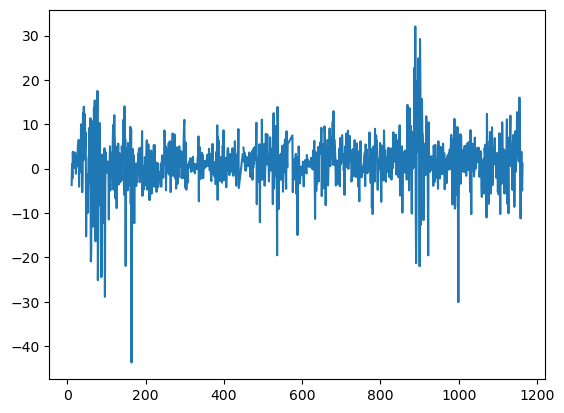

In [77]:
df.iloc[:,76].plot()
date[800]

In [78]:
df_cum.to_csv('factor_timing.csv')

In [95]:
df_bsadf = pd.read_csv('factor_timing_bsadf.csv')
df_bsadf = df_bsadf.drop(columns='Unnamed: 0')
df_bsadf

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.466323,NaN,-1.564077,NaN,-3.469004,-1.802042,-2.647018
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.425211,NaN,-1.465062,NaN,-3.363733,-1.626161,-2.449507
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.398627,NaN,-1.182933,NaN,-3.051713,-1.331183,-2.172458
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.293802,NaN,-0.900810,NaN,-1.760920,-0.509285,-0.982090
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.991729,NaN,-1.074542,NaN,-1.896579,-1.386392,-1.617779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.572847,-0.795824,-0.853787,1.057336,5.727248,-1.701533,1.455210,1.407158,-0.602277,1.866170,...,2.849362,2.841735,-0.698718,0.559928,1.660936,-1.378430,-0.797623,-1.008190,-0.905144,-1.024873
1087,0.436680,-0.723609,-0.860111,1.140592,4.778173,-1.701433,1.448134,0.982614,-0.658806,1.840645,...,2.393734,3.002594,-0.610888,0.411314,1.660964,-1.440236,-0.792906,-1.144082,-0.781674,-1.124271
1088,0.573291,-0.807459,-0.865694,1.220417,6.085885,-1.701334,1.441103,0.858415,-0.511885,1.835781,...,2.170736,4.076869,-0.309662,0.392832,1.598945,-1.401262,-0.786699,-1.094658,-0.851367,-1.017454
1089,0.565290,-0.754270,-0.858467,1.090240,5.924994,-1.701236,1.434117,0.807667,-0.358817,1.647882,...,2.067719,5.239867,0.252182,0.382694,1.768889,-1.441752,-0.495391,-1.024173,-0.898719,-0.968832


In [96]:
df_bsadf = df_bsadf.fillna(-5)


In [84]:
df_cv = pd.read_csv('factor_timing_cv.csv')
df_cv = df_cv.drop(columns='Unnamed: 0')
df_cv

,90%,95%,99%
0,-0.419323,-0.044048,0.652558
1,-0.328034,0.062981,0.740887
2,-0.262795,0.130426,0.790436
3,-0.218969,0.167972,0.859667
4,-0.176969,0.209597,0.889935
...,...,...,...
1086,1.261966,1.542436,2.078723
1087,1.261966,1.542436,2.078723
1088,1.261966,1.542436,2.078723
1089,1.261966,1.543007,2.078723


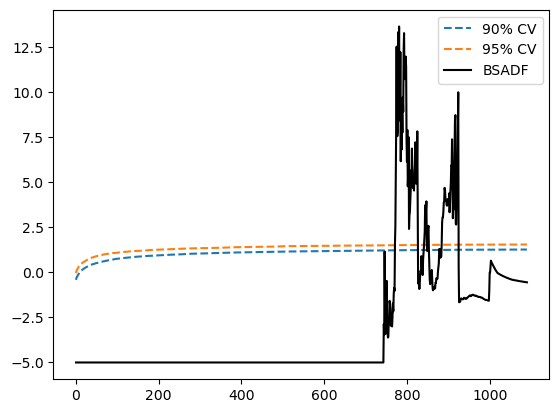

In [97]:
import matplotlib.pyplot as plt
plt.plot(df_cv.iloc[:,0],'--',label='90% CV')
plt.plot(df_cv.iloc[:,1],'--',label='95% CV')
plt.plot(df_bsadf.iloc[:,150],label='BSADF',color='black')
plt.legend()

In [103]:
df_indicator = pd.DataFrame()
CV95 = df_cv.iloc[:,1]
for column in df_bsadf.columns:
    x = df_bsadf[column]
    df_indicator = pd.concat([df_indicator,(x>CV95)],axis=1)

df_indicator

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,False,False,False,False,True,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
1087,False,False,False,False,True,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
1088,False,False,False,False,True,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
1089,False,False,False,False,True,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False


In [107]:
df_ret = df.iloc[73:,:]
df_ret = df_ret.fillna(0)
df_ret

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
73,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.799896,0.000000,-7.479864,0.000000,-4.484934,-6.831761,-8.333049
74,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.367763,0.000000,6.468371,0.000000,7.984901,5.768481,7.427164
75,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.047635,0.000000,11.744371,0.000000,7.909377,7.308398,4.594836
76,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.934517,0.000000,7.579427,0.000000,20.577404,15.939529,15.473043
77,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,12.234900,0.000000,-3.576479,0.000000,-3.246044,-11.742906,-5.731496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1.019538,-2.412224,-1.913597,1.928721,2.741776,0.0,0.0,1.347350,-4.050457,0.510279,...,-1.615839,-11.692944,-8.326179,-4.467901,0.216663,-5.978392,8.577257,-2.591933,-2.451913,-1.467892
1160,-2.888651,2.895650,-0.492878,1.546341,-5.482939,0.0,0.0,-6.515619,-2.104168,-0.242502,...,-4.828041,2.106418,2.906625,-3.030688,0.105947,8.239848,0.485810,10.430349,6.948029,4.607782
1161,3.384184,-3.041480,-0.437972,1.439492,14.154554,0.0,0.0,-2.241708,5.847384,0.048826,...,-2.659325,13.064743,9.269617,-0.339419,-0.638394,-4.242074,-8.276771,-4.179820,-3.358313,-5.818550
1162,-0.060910,2.179653,0.734355,-1.934128,-0.503022,0.0,0.0,-0.914064,5.350460,-2.491341,...,-1.242773,11.645717,14.288103,-0.150439,2.255298,5.601910,-5.353664,-6.738538,-2.475098,-2.581228


In [110]:
df_signal = pd.DataFrame(0,index=np.arange(1091),columns=df_ret.columns)
df_signal

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
N,M = df_ret.shape
for j in range(M):
    for i in range(N):
        if df_indicator.iloc[i,j] and df_ret.iloc[i,j]>0:
            df_signal.iloc[i,j]=1

df_signal

,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AnalystRevision,...,retConglomerate,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade,zerotradeAlt1,zerotradeAlt12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1087,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1088,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1089,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [158]:
x=(df_signal.shift(-1)-df_signal).dropna()
y = abs(x).sum(axis=1)
y.head(10)

0    7.0
1    6.0
2    3.0
3    8.0
4    9.0
5    5.0
6    9.0
7    0.0
8    1.0
9    4.0
dtype: float64

In [139]:

signals = df_signal.iloc[1,:]
rets = df_ret.iloc[2,:]
num = signals.sum()
W = W*(np.multiply(signals,1+rets/100).sum())/num
W

105.0333987641753

In [200]:
W = [0 for _ in range(N)]
W[0] = 100

for i in range(N-1):
    signals = df_signal.iloc[i,:]
    rets = df_ret.iloc[i+1,:]
    num = signals.sum()
    if num>0:
        W[i+1] = W[i]*(np.multiply(signals,1+rets/100-0.002*y[i]/num).sum())/num
    else:
        W[i+1] = W[i]*(((1+rets/100-0.002*y[i]/M)).sum())/M

W

[100,
 100.72736138133332,
 104.77758225726892,
 108.73425610788483,
 112.37310594258891,
 112.65958291151439,
 129.8358680258951,
 128.75144758468713,
 133.193445068603,
 135.2595011437663,
 135.5508200904126,
 138.9705518612194,
 142.32265399668768,
 152.49886284169517,
 167.42681786926428,
 200.93288643190277,
 222.83715673530355,
 226.80261257414395,
 216.9688778612668,
 210.88550208984313,
 212.23808153162048,
 216.62964215148477,
 219.82517994033185,
 246.10149661687618,
 256.68411654903656,
 255.27245854439104,
 264.3808783757625,
 259.7328661440156,
 261.87541718109657,
 261.6600922178144,
 261.2221327399922,
 261.80897391305996,
 266.75885674023294,
 272.4462031793896,
 276.82342771300443,
 283.7444859219669,
 294.2133148716745,
 297.1468733733943,
 295.5264827586308,
 305.4617118356782,
 307.14767329128614,
 319.5838510342017,
 320.3671919001638,
 330.2854300400879,
 341.1344043677611,
 346.1208769751852,
 350.8408320728812,
 396.34450290632816,
 396.2240485732114,
 398.93312

In [128]:
W0 = [0 for _ in range(N)]
W0[0] = 100
for i in range(N-1):
    rets = df_ret.iloc[i+1,:]

    W0[i+1] = W0[i]*((1+rets/100).sum())/M

In [134]:
x = (1+df_ret/100).sum(axis=1)/212
x[1:].cumprod()*100

74       100.685929
75       101.088001
76       102.670564
77       102.492487
78       100.542115
           ...     
1159    4605.413575
1160    4642.081152
1161    4701.750891
1162    4721.879938
1163    4743.005916
Length: 1090, dtype: float64

([<matplotlib.axis.XTick at 0x7ff5060c9630>,
 [Text(0, 0, '29/02/1932'),
  Text(200, 0, '30/10/1948'),
  Text(400, 0, '30/06/1965'),
  Text(600, 0, '26/02/1982'),
  Text(800, 0, '30/10/1998'),
  Text(1000, 0, '30/06/2015')])

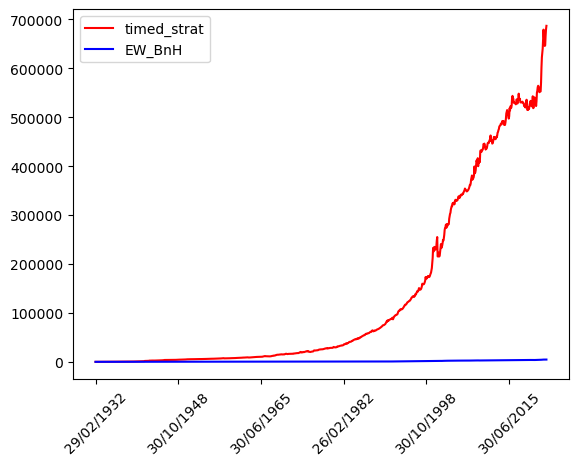

In [201]:
plt.plot(W,label='timed_strat',color='red')
plt.plot(W0,label='EW_BnH',color='blue')
plt.legend()
plt.xticks([0,200,400,600,800,1000],[date[73],date[273],date[473],date[673],date[873],date[1073]],rotation=45)

In [199]:
date[-80:-25]

1084    31/05/2016
1085    30/06/2016
1086    29/07/2016
1087    31/08/2016
1088    30/09/2016
1089    31/10/2016
1090    30/11/2016
1091    30/12/2016
1092    31/01/2017
1093    28/02/2017
1094    31/03/2017
1095    28/04/2017
1096    31/05/2017
1097    30/06/2017
1098    31/07/2017
1099    31/08/2017
1100    29/09/2017
1101    31/10/2017
1102    30/11/2017
1103    29/12/2017
1104    31/01/2018
1105    28/02/2018
1106    29/03/2018
1107    30/04/2018
1108    31/05/2018
1109    29/06/2018
1110    31/07/2018
1111    31/08/2018
1112    28/09/2018
1113    31/10/2018
1114    30/11/2018
1115    31/12/2018
1116    31/01/2019
1117    28/02/2019
1118    29/03/2019
1119    30/04/2019
1120    31/05/2019
1121    28/06/2019
1122    31/07/2019
1123    30/08/2019
1124    30/09/2019
1125    31/10/2019
1126    29/11/2019
1127    31/12/2019
1128    31/01/2020
1129    28/02/2020
1130    31/03/2020
1131    30/04/2020
1132    29/05/2020
1133    30/06/2020
1134    31/07/2020
1135    31/08/2020
1136    30/0